# Project 7: Machine Learning using Simple Linear Regression 
## Project Summary:
- **Author** Derek Graves
- **Date** 22 Feb 2024
- **GitHub Repository** https://github.com/dgraves4/datafun-07-ml
- **Purpose** This project is a series of guided learning exercises that serve to showcase the use of machine learning, and in particular, a simple type of supervised machine learning called simple linear regression to build a model, make predictions, visualize the model, and publish insights about the final product. 

## Environment Setup
This section provides a setup of the project through creating a virtual environment and installing required packages. See the Project README for detailed step-by-step instructions.

### Import Dependencies

In [972]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np



## Part- 1 Chart a Straight Line

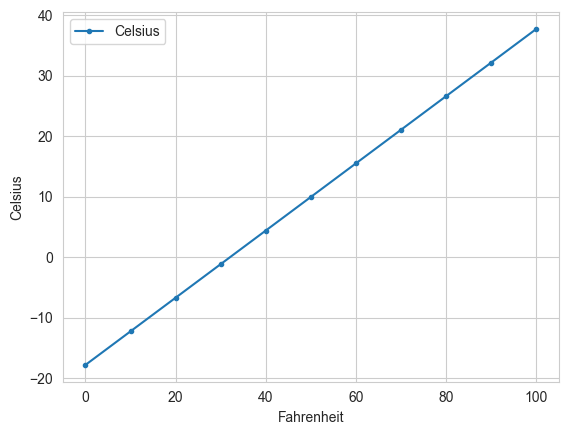

In [973]:
# Lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5/9*(f-32)

# Tupule data for temps 0-100 in 10 degree increments.
temps = temps = [(f, c(f)) for f in range(0, 101, 10)]

# Place the data in a DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Set axis and use plot method to display relationship between Farenheit and Celsius temps 
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part- 2 Predict Avg High Temp in NYC in Juanuary 

### Section 1 - Data Acquisition

Load the New York City data from ave_hi_nyc_jan_1895-2018.csv and observe the DataFrame's head and tail:

In [974]:
nyc_df = pd.read_csv('C:/Users/derek/OneDrive/Documents/44608 Data Analytics Fundamentals/Mod 7/datafun-07-ml/Examples/ch10/ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

Display the head and tail of the Dataframe:

In [975]:
# Display DataFrame head: 
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [976]:
# Display DataFrame tail:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Rename the 'Value' column as 'Temperature' for readability:

In [977]:
# Rename 'Value' column
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Display change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [978]:
# Check column type
nyc_df.Date.dtype 

dtype('int64')

Make x-axis more readable by removing 01 (January).  Call Series method floordiv to perform integer division on every element:

In [979]:
nyc_df.Date = nyc_df.Date.floordiv(100)

#Display head to verify change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4: Descriptive Statistics

Set the display precision and get some quick statistics by calling describe on Temperature column:

In [980]:
# Set display precision to 2 decimal places 
pd.set_option('display.precision', 2)

# Use describe() to get basic discriptive statistics and data types
nyc_df.describe()
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model 

Use the SciPy stats module linregress to calculate slope and intercept for the best fit line through the data:

In [981]:
# Calculate regression line's slope and intercept
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

# View linegress slope and intercept values
linear_regression.slope

linear_regression.intercept



8.694993233674289

In [982]:
# View slope value
linear_regression.slope

0.014771361132966163

In [983]:
# View intercept value
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

Using the model, predict the "average high temp in Jan" for the year 2024:

In [984]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

We can also use the model to predict the "average high temp in Jan" for the year 1890:

In [985]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7: Visualizations

Use Seaborn to generate a scatterplot of the data with a best fit line:

(10.0, 70.0)

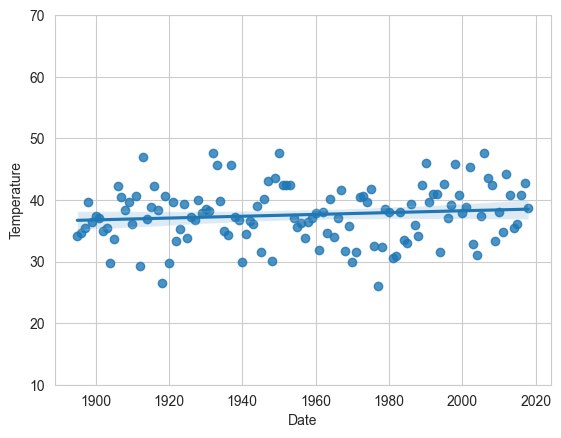

In [986]:
# Configure Seaborn to use 'whitegrid' style for chart readablility
sns.set_style('whitegrid')

# Define x and y axis
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

# Scale y axis range to emphasize linear relationship
axes.set_ylim(10, 70)

## Part- 3 Predict Avg High Temp in NYC in January 

### Section 1: Build the Model 

Import and use test_train_split to split the data into parts for training and testing:

In [987]:
from sklearn.model_selection import train_test_split

In [988]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

Confirm the 75%-25% train-test split by checking the shapes of our sets:

In [989]:
X_train.shape

(93, 1)

In [990]:
X_test.shape

(31, 1)

Train the Model using Linear Regression Fit:

In [991]:
# Import LinearRegression and train estimator
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

View the returned coef_ and intercept_  attributes needed for the line equation (y = mx + b): 

In [992]:
# View coefficient
linear_regression.coef_

array([0.01939167])

In [993]:
# View intercept
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

Test the model using the data in x_test and check some predictions from the dataset:

In [994]:
# Define predicted 
predicted = linear_regression.predict(X_test)

In [995]:
# Define expected 
expected = y_test

In [996]:
# Display predicted and expected values for every fifth element
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict 

Use the Model to predict the "average high temp in Jan" for the year 2024 and 1890:

In [997]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [998]:
predict(2024)

array([38.94094855])

In [999]:
predict(1890)

array([36.34246432])

### Section 4 - Visualizations

Create a scatter plot of the dataset using Seaborn's scatterplot function and Matplotlib's plot function:

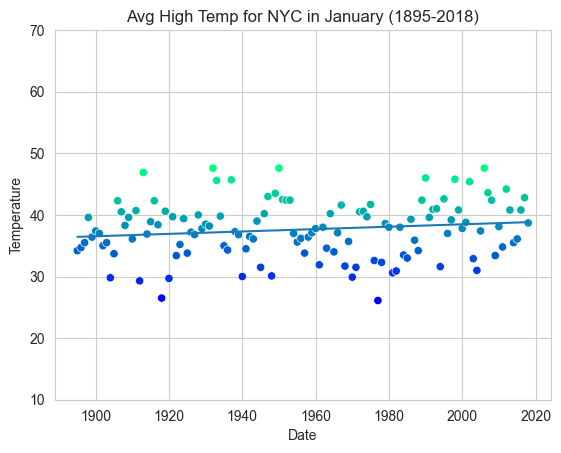

In [1000]:
# Display datapoints with scatterplot
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)

# Scale y-axis values
axes.set_ylim(10, 70)

# Generate array of 'date' x values
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

# Use predict function 
y = predict(x)

# Plot linear regression line
line = plt.plot(x, y)

# Add title to the plot for readability
axes.set_title("Avg High Temp for NYC in January (1895-2018)")

# Show plot
plt.show()



## Part 4 - Insights and Observations

